In [79]:
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit


In [3]:
cd /Users/austinmcdonald/Desktop/data/TeaPot/PMT-TEST

/Users/austinmcdonald/Desktop/data/TeaPot/PMT-TEST


In [10]:
Cs = np.genfromtxt('Cs137-1/area-Cs137')
Co = np.genfromtxt('Co60/area-Co60')

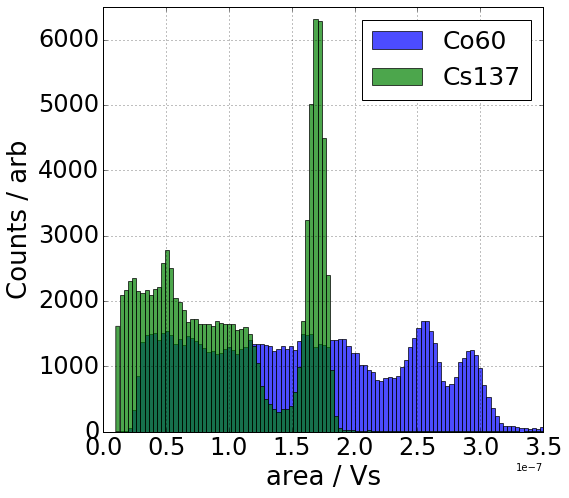

In [89]:
bins = np.linspace(1e-8,4e-7,120)
plt.figure(figsize=(8,7))

plt.hist(Co,bins=bins,alpha=0.7,color='blue',label='Co60')
plt.hist(Cs,bins=bins,alpha=0.7,color='green',label='Cs137')

plt.xlim(0,3.5e-7)
plt.ylim(0,6500)
plt.xlabel(r'area / Vs',fontsize=26)
plt.ylabel('Counts / arb',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=25)
plt.tight_layout()

#plt.savefig('/Users/austinmcdonald/Desktop/PMT-test.pdf')

plt.show()

In [43]:
max(Cs)
np.where(Cs == max(Cs))[0][0]
Cs[67141]

5.4170645567048381e-07

In [45]:
bins = np.linspace(1e-8,4e-7,120)
histco, bin_edgesco = np.histogram(Co,bins=bins)
bin_co = (bin_edgesco[:-1] + bin_edgesco[1:])/2
histcs, bin_edgescs = np.histogram(Cs,bins=bins)
bin_cs = (bin_edgescs[:-1] + bin_edgescs[1:])/2

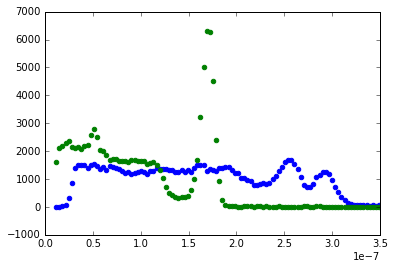

In [53]:
plt.scatter(bin_co,histco,color='blue',label='Co60')
plt.scatter(bin_cs,histcs,color='green',label='Cs137')

plt.xlim(0,3.5e-7)
plt.show()

In [86]:
a = max(histcs[0:11])
b = np.where(histcs[0:11] == a)[0][0]
CsE1 = bin_cs[b]
CsE1

2.4747899159663866e-08

In [75]:
a = max(histcs)
b = np.where(histcs == a)[0][0]
CsE2 = bin_cs[b]

In [61]:
a = max(histco)
b = np.where(histco == a)[0][0]
CoE1=bin_co[b]

In [62]:
a = max(histco[80:100])
b = np.where(histco == a)[0][0]
CoE2=bin_co[b]

m = 4950497671.55
b = -159.562182092


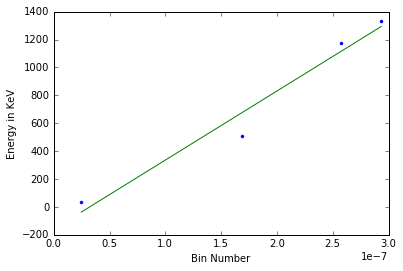

In [87]:
# sample data
x = np.array([CsE1,CsE2,CoE1,CoE2])
y = np.array([32,511,1173,1332] )

# fit with np.polyfit
m, b = np.polyfit(x, y, 1)

plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-')
print('m =',m)
print('b =',b)
plt.ylabel('Energy in KeV')
plt.xlabel('Bin Number')
#plt.savefig('Ba133 Spectrum.pdf')
plt.show()

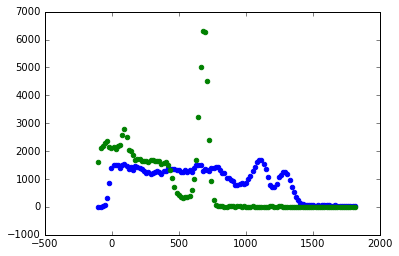

In [88]:
energy = m*bin_co+b
plt.scatter(energy,histco,color='blue',label='Co60')
plt.scatter(energy,histcs,color='green',label='Cs137')
